In [108]:
%reload_ext autoreload
%autoreload 2 
import numpy as np
import matplotlib.pyplot as plt  

from env import SingleStateSpace 
from env import DoubleStateSpace
from RewardFunctions import SingleStateReward
from RewardFunctions import DoubleStateReward

from generate_trajectory import generate_trajectory
from policy import Boltzmann 
from learn import policy_iteration
from learn import compute_q_with_values
from policy_walk import policy_walk 


In [106]:
#Set up the environment
trajectory_length = 20
# env = SingleStateSpace(n_actions = 10, discount_rate = 0.1, R_max = 5)
env = DoubleStateSpace(n_actions=10, discount_rate = 0.1)
#generate observation times 
observation_times = np.cumsum(np.random.uniform(0, 2, size=trajectory_length))
print("Generated observation times:") 
print(observation_times)

#Create a matrix for the true rewards 
s_grid, a_grid, t_grid = np.meshgrid(env.states, env.actions, observation_times, indexing='ij')
R = np.vectorize(env.reward)(s_grid,a_grid,t_grid)

#Find the optimal policy, values and q_values for the true reward to generate the trajectory. 
alpha = 1
(optimal_pi, optimal_values, optimal_q_values) = policy_iteration(env,trajectory_length,R)
b = Boltzmann(optimal_q_values, env.actions, alpha = alpha)

#multiple trajectories are combined - just means that the agent does multiple things at each time slot to allow for more data to be gathered
observations = generate_trajectory(env,b,observation_times, n_trajectories=10) 
step_size = 0.005
# step_size = 0.035

print(observations)


# Sample from policy walk - I discard the first half of each policy walk iteration.
# learned_rewards, acceptance_probs = policy_walk(env,observations,n_observations = trajectory_length,step_size = step_size,n_iters=100000, alpha = alpha)
# policy_walk_iters = 1
# for _ in range(policy_walk_iters-1): 
#     learned_rewards = np.concatenate((learned_rewards, policy_walk(env,observations,n_observations = trajectory_length,Sigma = Sigma, n_iters=10000, alpha = alpha )[5000:]))

Generated observation times:
[ 0.43179875  2.15014064  3.51490918  4.83019841  5.93491936  6.60254142
  8.23443819  9.93817182 11.4005758  12.98357114 14.51028637 14.6866068
 16.62036649 16.88324282 17.58274158 18.56980652 18.66151642 19.93309448
 21.51091531 23.18916098]
[[0, 1, 0], [0, 0, 1], [1, 3, 2], [0, 7, 3], [0, 0, 4], [1, 7, 5], [0, 0, 6], [0, 0, 7], [1, 7, 8], [1, 7, 9], [0, 0, 10], [1, 5, 11], [1, 3, 12], [1, 3, 13], [1, 3, 14], [0, 0, 15], [0, 0, 16], [0, 0, 17], [1, 1, 18], [0, 0, 19], [0, 1, 0], [0, 5, 1], [0, 0, 2], [0, 0, 3], [0, 9, 4], [0, 7, 5], [0, 0, 6], [1, 2, 7], [1, 9, 8], [1, 7, 9], [1, 5, 10], [0, 0, 11], [0, 0, 12], [1, 3, 13], [1, 2, 14], [0, 0, 15], [0, 0, 16], [0, 0, 17], [0, 0, 18], [0, 0, 19], [0, 1, 0], [0, 1, 1], [0, 3, 2], [0, 5, 3], [0, 0, 4], [1, 7, 5], [0, 0, 6], [0, 0, 7], [1, 8, 8], [0, 0, 9], [0, 0, 10], [0, 0, 11], [1, 3, 12], [1, 3, 13], [1, 3, 14], [0, 1, 15], [0, 0, 16], [1, 9, 17], [0, 0, 18], [1, 3, 19], [0, 1, 0], [0, 2, 1], [0, 0, 2], [1,

In [109]:
#Run profiling on policy walk 
import cProfile
import re 
cProfile.run('re.compile(policy_walk(env,observations,n_observations = trajectory_length,step_size = step_size,n_iters=100000, alpha = alpha))')

         1774601575 function calls in 2465.750 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      376    0.000    0.000    0.004    0.000 <__array_function__ internals>:177(all)
      189    0.000    0.000    0.003    0.000 <__array_function__ internals>:177(any)
 33480681   34.474    0.000  196.629    0.000 <__array_function__ internals>:177(argmax)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(prod)
100451696   98.849    0.000  687.510    0.000 <__array_function__ internals>:177(sum)
        1    0.000    0.000 2465.750 2465.750 <string>:1(<module>)
      189    0.000    0.000    0.001    0.000 _methods.py:54(_any)
      567    0.001    0.000    0.001    0.000 copy.py:66(copy)
 33480681    4.837    0.000    4.837    0.000 fromnumeric.py:1123(_argmax_dispatcher)
 33480681   37.523    0.000  130.926    0.000 fromnumeric.py:1127(argmax)
100451696   14.336    0.000   14.336    0.000 fromn

KeyboardInterrupt: 

Analysis of Acceptance Probabilities:

0.13526739298845283


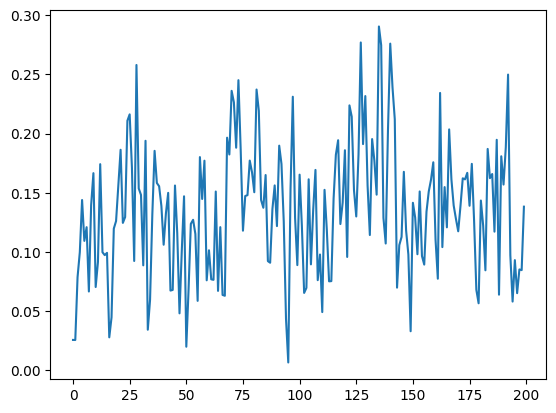

In [84]:
#Scatter plot of thinned acceptance probabilities - change policy_walk to return acceptance probabilities to use
print(np.average(acceptance_probs))
# plt.scatter(range(len(acceptance_probs[14::15])), acceptance_probs[14::15])
# plt.show()

# Moving average of acceptance probabilities
import math
window_size = 500
n_windows = math.floor(len(acceptance_probs)/window_size) 
averages = [] 
for i in range(n_windows): 
    averages.append(np.average(acceptance_probs[window_size*i:window_size*(i+1)]))
plt.plot(averages)
plt.show() 


Analysis of Average Learned Reward Matrix

[ 1.50280026  2.33489436  4.25966917  5.8774774   6.80096514  7.9658788
  8.0594949   8.82576969  9.62789028 10.32452787 11.65769061 12.46171336
 14.11383165 14.46199592 16.37514493 16.94518378 17.66290767 18.91134696
 19.00325072 19.60133002]


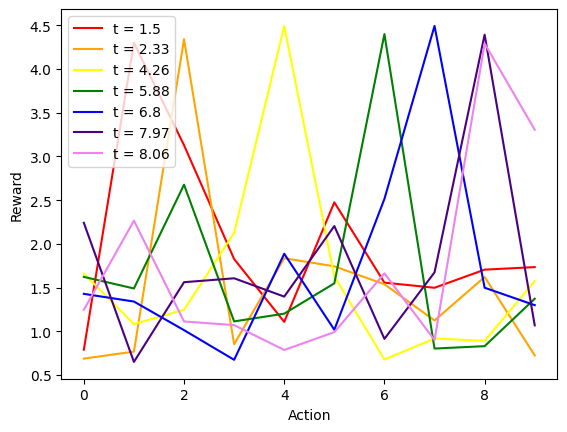

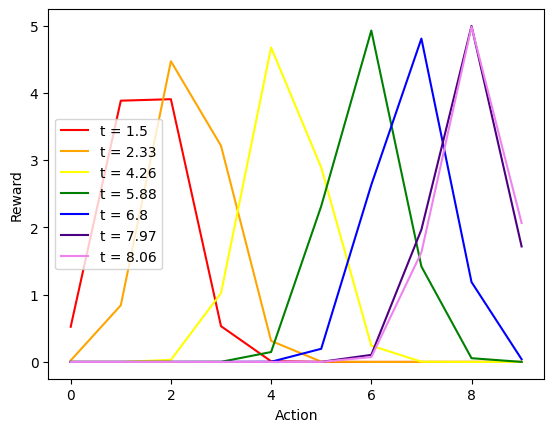

In [85]:
#Shows hte overall learned rewards - switch to the bigger colors array to view all 
# colors = ["#e71d43","#ff0000","#ff3700","#ff6e00","#ffa500","#ffc300","#ffe100","#ffff00","#aad500","#55aa00","#008000","#005555","#002baa","#0000ff","#1900d5","#3200ac","#4b0082","#812ba6","#b857ca","#d03a87"]
avg_reward = np.average(np.asarray(learned_rewards),axis = 0)
print(observation_times)
colors = ["red", "orange","yellow","green","blue","indigo","violet"]
for t in range(7):
    label = "t = " + format(round(observation_times[t],2))
    plt.plot(avg_reward[0,:,t], color=colors[t], label = label)
plt.ylabel("Reward")
plt.xlabel("Action")
plt.legend()
plt.show()

for t in range(7):
    label = "t = " + format(round(observation_times[t],2))
    plt.plot(R[0,:,t], color=colors[t], label = label)
plt.ylabel("Reward")
plt.xlabel("Action")
plt.legend()
plt.show()

Chain Analysis

[[0, 2, 0], [0, 2, 1], [0, 4, 2], [0, 6, 3], [0, 7, 4], [0, 8, 5], [0, 8, 6], [0, 9, 7], [0, 9, 8], [0, 9, 9], [0, 8, 10], [0, 8, 11], [0, 6, 12], [0, 6, 13], [0, 4, 14], [0, 3, 15], [0, 1, 16], [0, 1, 17], [0, 1, 18], [0, 0, 19], [0, 1, 0], [0, 2, 1], [0, 4, 2], [0, 6, 3], [0, 7, 4], [0, 8, 5], [0, 9, 6], [0, 8, 7], [0, 2, 8], [0, 9, 9], [0, 8, 10], [0, 7, 11], [0, 6, 12], [0, 5, 13], [0, 4, 14], [0, 3, 15], [0, 2, 16], [0, 1, 17], [0, 1, 18], [0, 0, 19], [0, 2, 0], [0, 2, 1], [0, 4, 2], [0, 6, 3], [0, 7, 4], [0, 8, 5], [0, 8, 6], [0, 9, 7], [0, 9, 8], [0, 4, 9], [0, 7, 10], [0, 8, 11], [0, 6, 12], [0, 6, 13], [0, 4, 14], [0, 3, 15], [0, 2, 16], [0, 1, 17], [0, 1, 18], [0, 0, 19], [0, 2, 0], [0, 2, 1], [0, 4, 2], [0, 6, 3], [0, 6, 4], [0, 8, 5], [0, 8, 6], [0, 9, 7], [0, 4, 8], [0, 9, 9], [0, 8, 10], [0, 8, 11], [0, 6, 12], [0, 6, 13], [0, 3, 14], [0, 3, 15], [0, 3, 16], [0, 2, 17], [0, 1, 18], [0, 1, 19], [0, 1, 0], [0, 2, 1], [0, 4, 2], [0, 6, 3], [0, 7, 4], [0, 8, 5], [0, 8, 6], [0

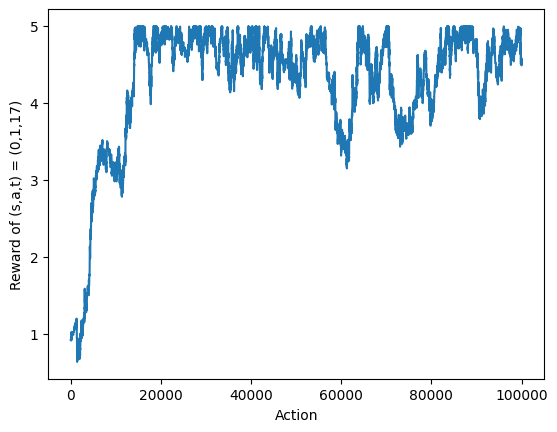

In [86]:
#Used to analyse individual chains: 
# print(observations)

#Plot a single reward
s,a,t = 0,1,17
plt.plot(learned_rewards[:,s,a,t])
ylabel = "Reward of (s,a,t) = (" + format(s) + "," + format(a) + "," + format(t) + ")"
plt.ylabel(ylabel)
plt.xlabel("Action")
plt.show()

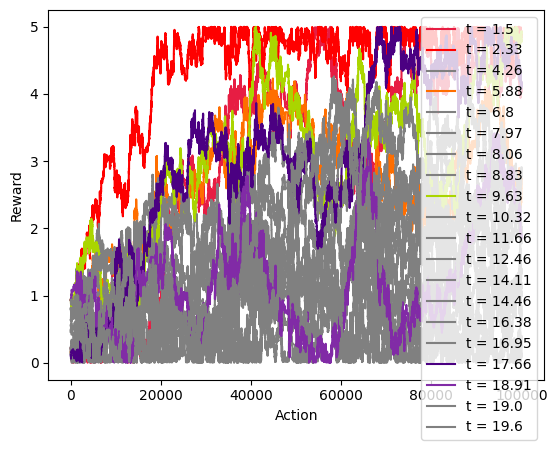

<Figure size 1600x1600 with 0 Axes>

In [104]:
#Plot rewards over time for a given state/action pair - shows observed (s,a,t) pairs in colour 
# print(observations)
s,a, = 0,2
# s,t = 0,5
colors = ["#e71d43","#ff0000","#ff3700","#ff6e00","#ffa500","#ffc300","#ffe100","#ffff00","#aad500","#55aa00","#008000","#005555","#002baa","#0000ff","#1900d5","#3200ac","#4b0082","#812ba6","#b857ca","#d03a87"]
for t in range(20):
    label = "t = " + format(round(observation_times[t],2))
    if [s,a,t] in observations: 
        plt.plot(learned_rewards[:,s,a,t], color=colors[t], label = label)
    else:
        plt.plot(learned_rewards[:,s,a,t], color="grey", label = label)        
    
plt.ylabel("Reward")
plt.xlabel("Action")
plt.legend()
plt.figure(figsize=(10,10), dpi=160)
plt.show()

Histogram Plots:

[ 1.50280026  2.33489436  4.25966917  5.8774774   6.80096514  7.9658788
  8.0594949   8.82576969  9.62789028 10.32452787 11.65769061 12.46171336
 14.11383165 14.46199592 16.37514493 16.94518378 17.66290767 18.91134696
 19.00325072 19.60133002]


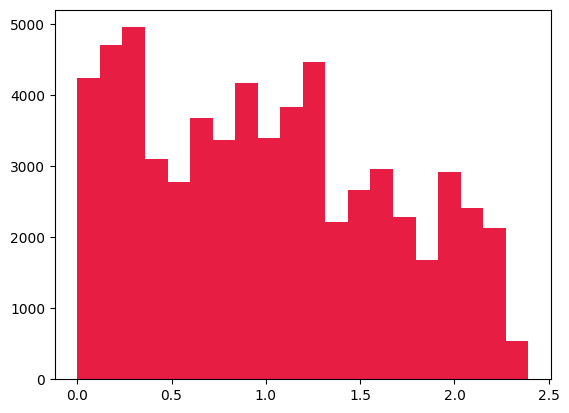

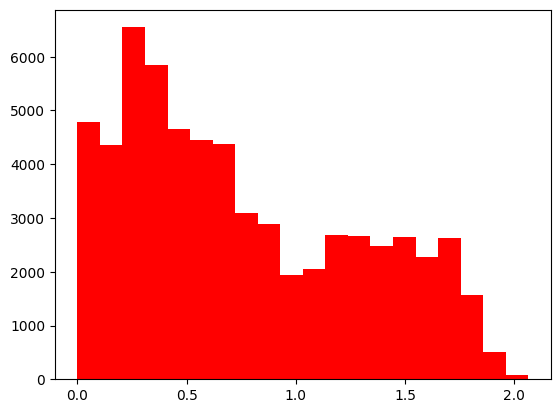

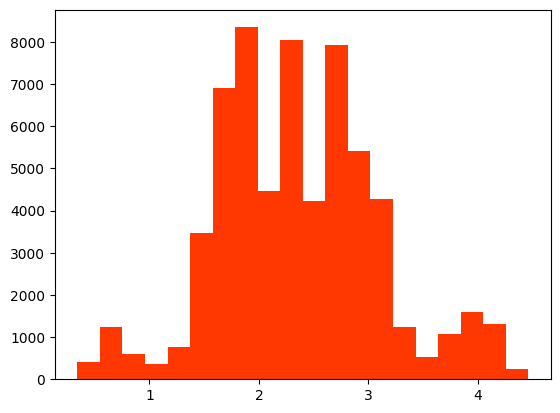

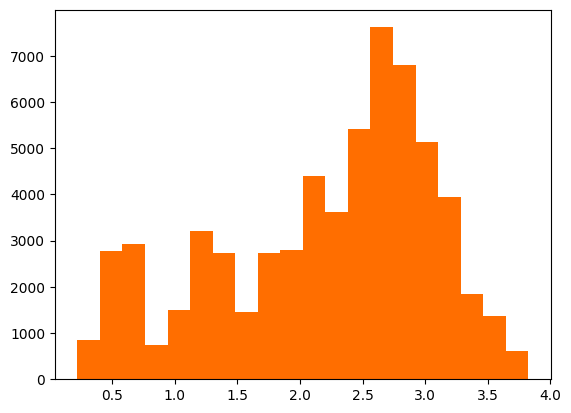

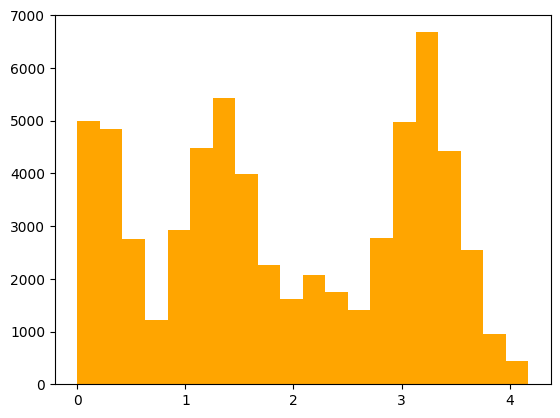

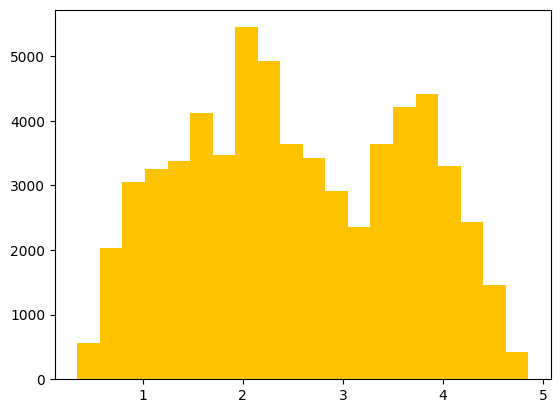

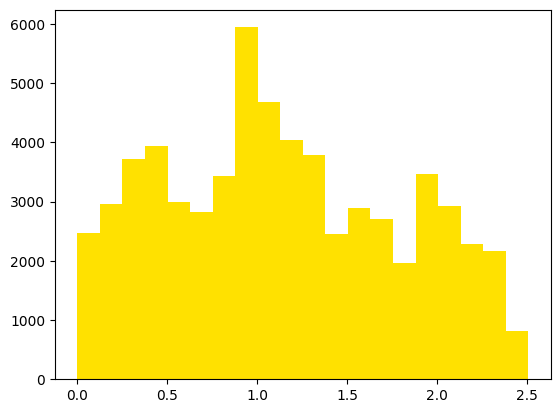

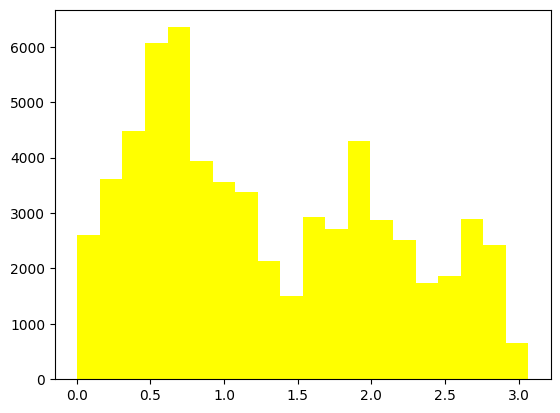

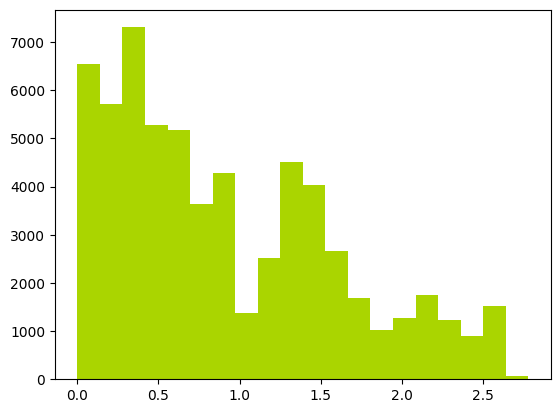

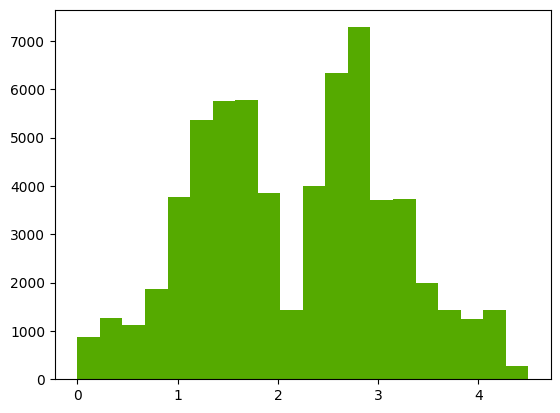

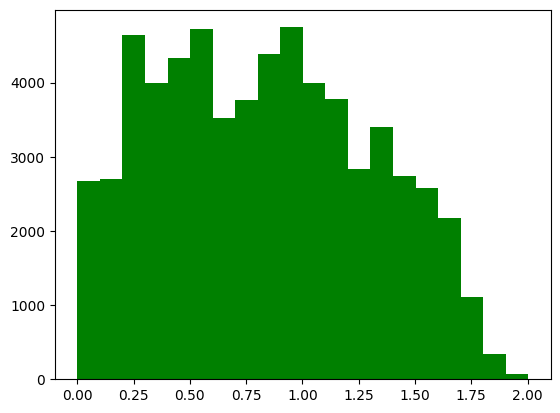

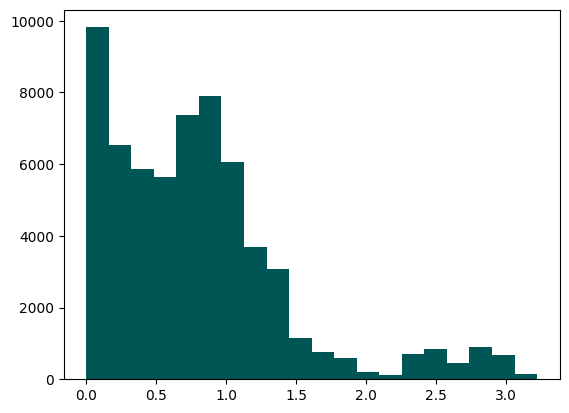

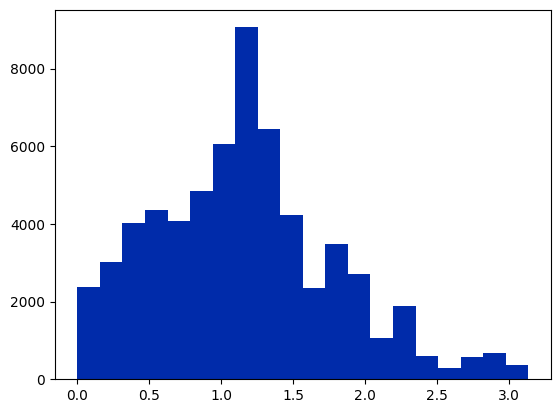

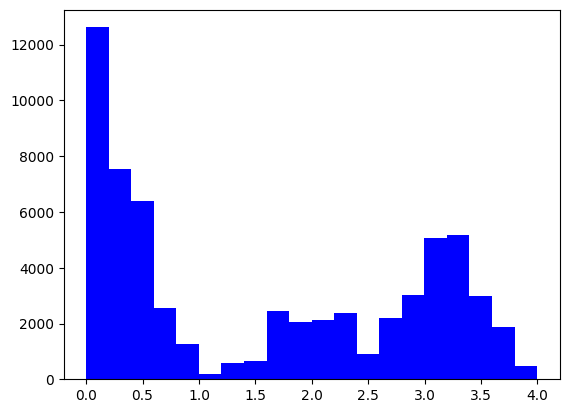

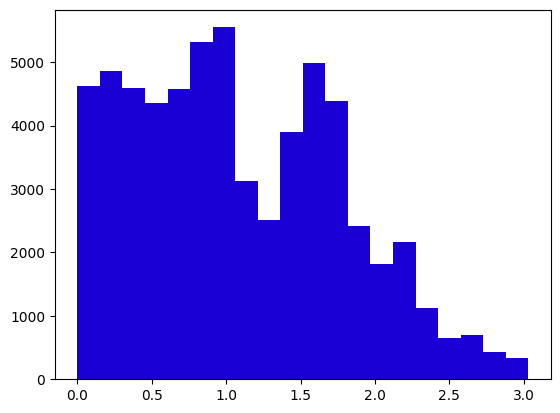

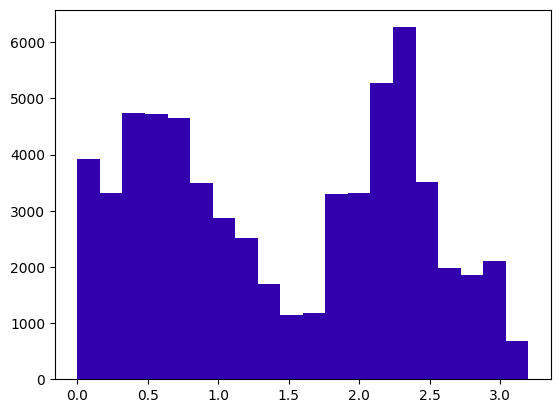

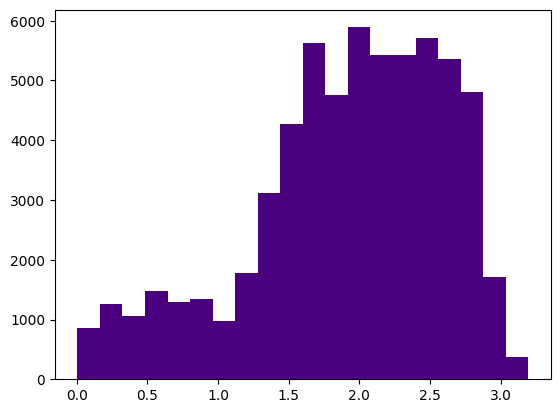

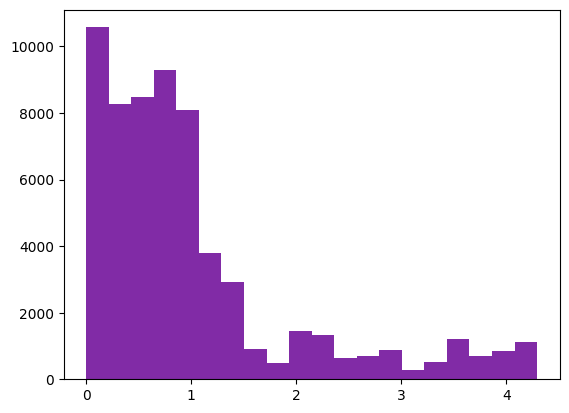

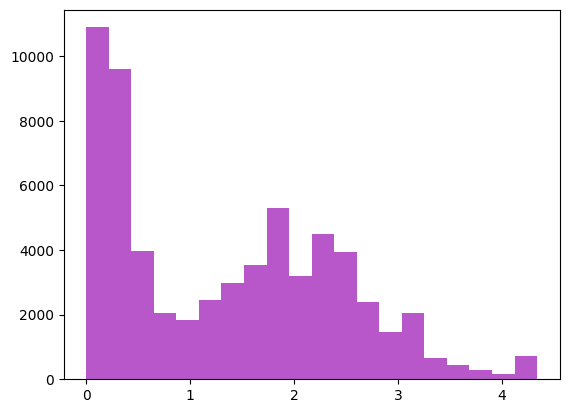

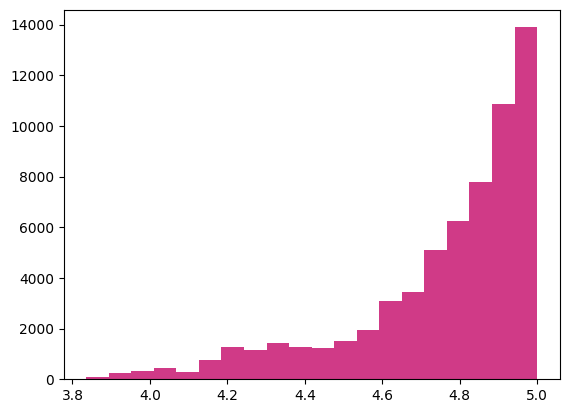

In [103]:
converged_rewards = learned_rewards[37500:]
print(observation_times)
s,a,t = 0,0,0
for t in range(20):
    plt.hist(converged_rewards[:,s,a,t],bins = 20,color=colors[t])
    plt.show()